# Linear Regression using Gradient Descent

We want to solve linear regression using Gradient Descent

# QUIZZ GRADIENT DESCENT:

1. What are the 3 main categories of Machine Learning?

    a. $\textcolor{red}{\text{Artificial Intelligence}}$

    b. $\textcolor{red}{\text{Perceptron algorithm}}$

    c. $\textcolor{red}{\text{Linear Regression}}$

    d. $\textcolor{green}{\text{Unsupervised Learning}}$

    e. $\textcolor{green}{\text{Supervised Learning}}$

    f. $\textcolor{green}{\text{Reinforcement Learning}}$

    g. $\textcolor{red}{\text{Learning algorithms}}$

2. What else is true about the Gradient Descent (GD)?

    a. $\textcolor{green}{\text{GD can diverge}}$

    b. $\textcolor{red}{\text{GD always converge to some result, eventually (if we perform enough iterations)}}$

    c. $\textcolor{red}{\text{GD goes in a somewhat random direction, but that is usually good to reduce the cost function}}$

    d. $\textcolor{green}{\text{GD can become infinitely slow, and fail to converge}}$

    e. $\textcolor{green}{\text{GD always goes in the best direction (steepest slope), to minimize the cost (locally at least)}}$

3. During learning (or "fitting"), what are we trying to do?

    a. $\textcolor{red}{\text{Finding the minimum value of the parameters}}$

    b. $\textcolor{green}{\text{Finding a local minimum of a cost function}}$

    c. $\textcolor{red}{\text{Finding the global minimum of a cost function}}$

    d. $\textcolor{red}{\text{Optimizing parameters values so as to minimize the parameters}}$

    e. $\textcolor{green}{\text{Optimizing parameters values so as to minimize an error function}}$

    f. $\textcolor{green}{\text{Performing iterations that are likely to decrease the error}}$

4. During learning (or "fitting"), what are we trying to do?

    a. $\textcolor{red}{\text{Finding the minimum value of the parameters}}$

    b. $\textcolor{green}{\text{Finding a local minimum of a cost function}}$

    c. $\textcolor{red}{\text{Finding the global minimum of a cost function}}$

    d. $\textcolor{red}{\text{Optimizing parameters values so as to minimize the parameters}}$

    e. $\textcolor{green}{\text{Optimizing parameters values so as to minimize an error function}}$

    f. $\textcolor{green}{\text{Performing iterations that are likely to decrease the error}}$

5. Give at least one example of a supervised learning algorithm/model:

    a. $\textcolor{green}{\text{Perceptron}}$

    b. $\textcolor{red}{\text{Learning algorithms}}$

    c. $\textcolor{red}{\text{Convolutional Neural Networks}}$

    d. $\textcolor{red}{\text{K-means}}$

    e. $\textcolor{green}{\text{Linear Regression}}$

    f. $\textcolor{red}{\text{Iterative Clustering}}$

6. The gradient descent's basic update, for parameters $\theta$ and cost function J, is:

    a. $\textcolor{red}{( w \leftarrow w + \eta \nabla_{\theta} J)}$

    b. $\textcolor{red}{( w \leftarrow w + \frac{1}{N} \eta \nabla_{\theta} J)}$

    c. $\textcolor{green}{( w \leftarrow w - \eta \nabla_{\theta} J)}$

    d. $\textcolor{red}{( w \leftarrow w - \frac{1}{N} \eta \nabla_{\theta} J)}$

7. After learning, assuming we have converged, what are the things which are needed to make an explicit prediction $\hat{y} = f(x)?$

    a. $\textcolor{red}{\text{The gradient of J (an explicit formula)}}$

    b. $\textcolor{green}{\text{The model (the explicit model's function)}}$

    c. $\textcolor{red}{\text{A maximum number of iterations}}$

    d. $\textcolor{red}{\text{A learning rate}}$

    e. $\textcolor{red}{T\text{he whole data set X}}$

    f. $\textcolor{green}{\text{The data point x}}$

    g. $\textcolor{green}{\text{The parameters values}}$

    h. $\textcolor{red}{\text{The initialization } \theta_{0}}$

8. To start a gradient descent (GD), what are the things which are $\textit{always}$ needed (for all algorithms we have seen)?

    a. $\textcolor{green}{\text{The whole data set X}}$

    b. $\textcolor{green}{\text{A learning rate}}$

    c. $\textcolor{red}{\text{The final values of the parameters}}$

    d. $\textcolor{green}{\text{A maximum number of iterations}}$

    e. $\textcolor{red}{\text{The model (the explicit model's function)}}$

    f. $\textcolor{red}{\text{Only one data point, the current one, x}}$

    g. $\textcolor{green}{\text{The gradient of J (an explicit formula)}}$

    h. $\textcolor{green}{\text{The initialization } \theta_{0}}$

9. To start the learning, what are the things which are $\textit{always}$ needed (for all algorithms we have seen)?

    a. $\textcolor{red}{\text{The data point x}}$

    b. $\textcolor{green}{\text{The whole data set X}}$

    c. $\textcolor{green}{\text{The gradient of J (an explicit formula)}}$

    d. $\textcolor{red}{\text{The model (the explicit model's function)}}$

    e. $\textcolor{green}{\text{The initialization } \Theta_0 }$

    f. $\textcolor{red}{\text{The parameters values}}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

# Part 0: getting the data

**Remark about the data**: here, we work with a **toy example** where the data is generated from a linear relationship + some noise. So, we can actually read the true value of the coefficients. 

But of course, **in real life, you do not have access** to the true model which generated the data, and certainly not access to its parameters either !

#### We help you create the data

In [165]:
def createData(N, theta0, theta1, sigmaNoise): 
    # Just to rescale the random values between [0,10)
    Xrange = 10
    
    # Dimension of data
    D = 1
    
    # The data X is an array of dimensions NxD (100x1) of random values between [0, 10)
    X = np.random.random((N,D))*Xrange
    #print(f" X: {X}")
    
    # We generate the values for the noise of dimensions (NxD) = (100x1)
    noise = np.random.normal(0,sigmaNoise, (N,D))
    #print(f" Noise: {noise}")
    
    # The ground truth "y" (ordinates axis) values are in the form y = a.x+b + noise
    y = theta0 + theta1*X + noise   # not available in real life
    #print(f" y: {y}")

    # Another method to create the data:
    theta = np.array([theta0, theta1]).reshape((2,1))
    #print(f" Theta: {theta}")

    # The function np.hstack is used to horizontally concatenate arrays, in this case the array (100x1) of 1's with X 
    # leading to a variable Xaugmented of dimensions (NxD) = (100x2)
    Xaugmented = np.hstack((np.ones((N,1)), X))
    #print(f" Xaugmented: {Xaugmented}")

    # This is the matrix multiplication of Xaugmented of dimension (NxD) = (100x2) and theta (2x1) plus noise
    y2 = (Xaugmented @ theta) + noise
    #print(f" y2: {y2}")
    
    # We then check that this prints ~0
    #print("Difference in the 2 methods:",  (abs(y-y2)).sum())
    
    return X, y

######### Data creation #########

# This line sets the seed of NumPy's random number generator to the value of seed. When you set the seed,
# it ensures that the sequence of random numbers generated by NumPy is the same every time you run the code.
# This is useful for reproducibility, especially when you want to share your code or compare results with others.
seed=42
np.random.seed(seed)

N=100
theta0=1.1                                                         # not available in real life
theta1=0.5                                                         # not available in real life
sigmaNoise = 0.5                                                   # not available in real life

# Training Data 
X_Train, y_Train = createData(N,theta0,theta1,sigmaNoise) 

# Test Data
N_Test = N//2
X_Test, y_Test = createData(N_Test,theta0,theta1,sigmaNoise)


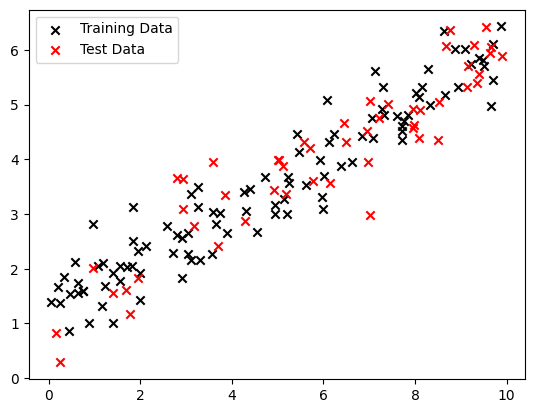

In [166]:
####### Data Visualization ###########
plt.figure()
plt.scatter(X_Train, y_Train, label="Training Data", marker='x', color='k')
plt.scatter(X_Test, y_Test, label= "Test Data", marker='x', color='red')
plt.legend()

# Part 1: Handcrafted Model

## 1. Model definition, initialization

- Create a model, i.e. a function $f_\Theta(x)$
- Choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately (if you have no idea, put a stupid thing to start, you'll make it better later.
- Make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [167]:
### The Model ###
def model(X, theta):
    return theta[0] + theta[1] * X


In [168]:
#### Hyper-parameters #####

# Learning rate
eta = 0.01

# Maximum of iterations
MaxIter = 500

# Dimensions
D = 1

# The complexity of a linear regression model is mainly 
# determined by the number of parameters it has.
# In this case, you have two parameters: theta0 and theta1.
C=D+1

In [169]:
## Initialization (in a sense, a hyper-parameter)
thetaInitial = np.random.random(2)
print(thetaInitial)

[0.17320187 0.43385165]


### Remark about the auxiliary ones trick:

If you prefer to write things using the trick of augmented X, to use more matrix operations, 
- you're right !
- go see the d-dimensional case, where the data X is defined with its augmented component (filled with ones)

But if you prefer not to, for now, it's ok.

## 2. Update rule

### Now the crucial part 

- **Take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error as Loss function.

### Now to code it

- Implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- Run it !
- Add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm

In [170]:
### Training function ###
def fit(model, eta, MaxIter, D, theta, X_Train, y_Train, X_Test, y_Test):

    # Training Error: This error is calculated based on the data used to train the model.
    # In the context of linear regression, it's calculated as the difference between
    # the model's predictions and the actual (ground truth) values in the training dataset. 
    # The purpose of training error is to assess how well the model fits the training data.
    # A low training error means that the model can fit the training data well, 
    # but it doesn't guarantee that it will perform well with new data.

    # Test Error: This error is calculated using a dataset that the model has not seen during training
    # i.e., test or validation data. Test error evaluates how well the model generalizes to data it
    # hasn't seen before. In the context of linear regression, it's calculated in the same way as 
    # training error but using the test dataset instead of the training dataset. 
    # The main goal of test error is to measure the model's ability to make accurate predictions
    # in real-world situations, where new data is encountered.

    # The key difference between these two types of error is that training error evaluates the model's
    # performance on the data it was trained on, while test error assesses its ability to generalize
    # to new data. The goal is for the model to have low test error, indicating that it can make 
    # accurate predictions on unseen data, suggesting that it has learned general patterns rather
    # than just memorizing the training data.

    # In practice, you aim for a balance between training and test error. A model with low training
    # error but high test error may be overfitting the training data and not generalizing well.
    # Monitoring both training and test error during training helps you fine-tune hyperparameters 
    # and assess whether the model is performing optimally.


    # Recording of training error
    trainError = np.zeros(MaxIter)
    
    # Recording of test error
    testError = np.zeros(MaxIter)

    for iteration in range(MaxIter):
        theta[0] = theta[0] - np.sum((2/N) * eta * (model(X_Train, theta) - y_Train))
        theta[1] = theta[1] - np.transpose((2/N) * eta *X_Train) @ (model(X_Train,theta) - y_Train)
        trainError[iteration] = np.mean((model(X_Train, theta)-y_Train)**2)
        testError[iteration] = np.mean((model(X_Test, theta)-y_Test)**2)
    return theta, trainError, testError

theta, trainError, testError = fit(model, eta, MaxIter, D, thetaInitial, X_Train, y_Train, X_Test, y_Test)

C:\Users\pmoll\AppData\Local\Temp\ipykernel_22160\805064287.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1] = theta[1] - np.transpose((2/N) * eta *X_Train) @ (model(X_Train,theta) - y_Train)


## 3. Training the model, testing the trained model

### Follow the results 

- Plot the data (train and test), the initial guess, and the final model (all 4 things on a single graph).
- On a separate plot, show the *training error* and *test error* evolution over the iterations (epochs)

Theta0: 1.1477864786929364, Theta1: 0.486146102614782
Training Error: 20.265986763911354 %
Test Error: 30.397758687083105 %


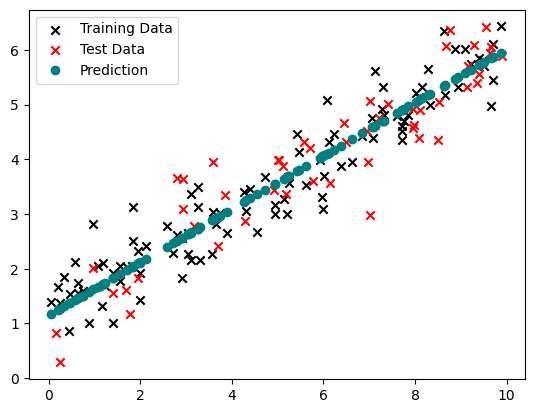

In [171]:
## Plot the data, the noiseless-teacher, the model that was learned
print(f"Theta0: {theta[0]}, Theta1: {theta[1]}")
print(f"Training Error: {trainError[-1]*100} %")
print(f"Test Error: {testError[-1]*100} %")
plt.figure(1)
plt.scatter(X_Train, y_Train, label = "Training Data", marker='x', color='k')
plt.scatter(X_Test, y_Test, label = "Test Data", marker='x', color='red')
plt.plot(X_Train, model(X_Train, theta), color='teal', marker="o", ls="", label="Prediction")
plt.legend()

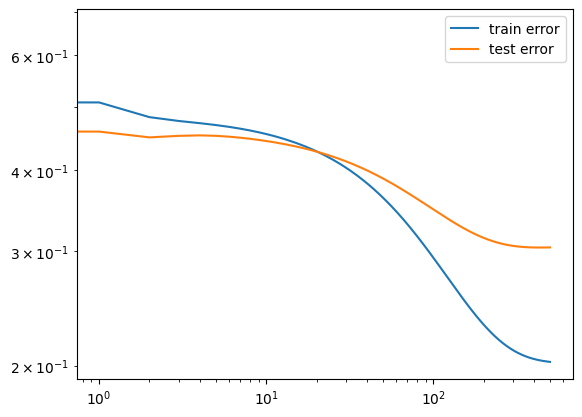

In [172]:
# Follow the evolution of Train and Test accuracy or Error
epochs = np.arange(MaxIter)
plt.figure(2)
plt.loglog(epochs, trainError, label='train error')
plt.loglog(epochs, testError, label='test error')
plt.legend()

# Part 2: sklearn solution

## Comparing with the sklearn implementation

We can now cheat using `sklearn`, to check whether our results are consistent with it (they will often be *slightly*  different!)

In [173]:
import sklearn
from sklearn import datasets

from sklearn.linear_model import LinearRegression
# In this line, a LinearRegression object is created. The fit_intercept=True parameter indicates that the model
# should fit an intercept (y-intercept), and copy_X=True means that a copy of the feature matrix X will be created
# before fitting the model. The n_jobs parameter is set to None, which means the model fitting won't be
# parallelized across multiple CPU cores.
reg_sklearn_object = sklearn.linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

# Here, the shape of the feature matrix X_Train is changed from (N,) to (N,1). 
# This is necessary for scikit-learn to work with X_Train in the correct format since
# it expects X to have dimensions (N, D) where D is the number of features.
Xreshaped = X_Train.reshape((N,1))

# Finally, this line fits the linear regression model to your training data Xreshaped and y_Train.
# The model will learn the coefficients for the linear regression and store those coefficients in
# the reg_sklearn_object object.
reg_sklearn_object.fit(Xreshaped,y_Train)

# To obtain the theta coefficients we call those arguments
theta_sklearn = np.array([reg_sklearn_object.intercept_, reg_sklearn_object.coef_[0]])
print("Coefficients of Theta fitted by sklearn: Theta0:", theta_sklearn[0][0], "Theta1:", theta_sklearn[1][0])

Xtest_resh = X_Test.reshape((N_Test,1))
print("Training Error:", (1-reg_sklearn_object.score(Xreshaped, y_Train))*100, "%")
print("Test Error:", (1-reg_sklearn_object.score(Xtest_resh, y_Test))*100, "%")

Coefficients of Theta fitted by sklearn: Theta0: 1.2075480787733741 Theta1: 0.4770113386438483
Training Error: 9.185628435317517 %
Test Error: 14.024637940419971 %


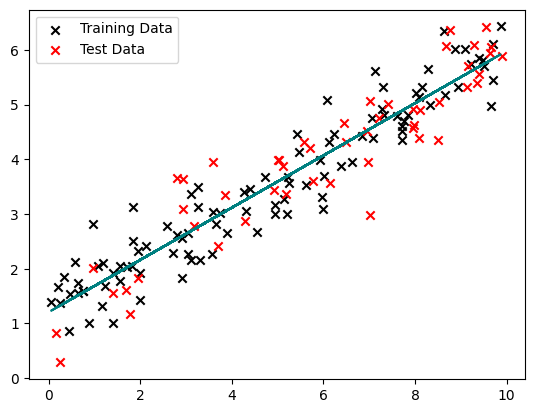

In [174]:
## Plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X_Train, y_Train, label="Training Data", marker='x', color='k')
plt.scatter(X_Test, y_Test, label= "Test Data", marker='x', color='red')
plt.plot(X_Train, model(X_Train, theta_sklearn), color='teal')
plt.legend()

### Homework: read and understand well each line in the sklearn piece of code

# Part 3:  the augmented X trick:

### Warning:

Make sure to complete the pen-and-paper exercise 1.1.2 of "Regressions.pdf" before trying to do this !

In [175]:
# We add ones where we need them
X_Train_aug = np.hstack((np.ones((N,1)), X_Train))
X_Test_aug = np.hstack((np.ones((N_Test,1)), X_Test))
theta_aug = thetaInitial.reshape(D+1,1) # 2x1

In [176]:
def model2(X, theta):
    return X@theta

In [177]:
def fit_augmented(model, eta, MaxIter, D, theta, X_Train, y_Train, X_Test, y_Test):
    # Recording of training error
    trainError = np.zeros(MaxIter)
    
    # Recording of test error
    testError = np.zeros(MaxIter)

    for iteration in range(MaxIter):
        theta = theta - np.transpose(X_Train) @ ((2/N) * eta * (model2(X_Train,theta) - y_Train))
        trainError[iteration] = np.mean((model2(X_Train, theta)-y_Train)**2)
        testError[iteration] = np.mean((model2(X_Test, theta)-y_Test)**2)
    return theta, trainError, testError

In [178]:
theta, trainError, testError = fit_augmented(model2, eta, MaxIter, D, theta_aug, X_Train_aug, y_Train, X_Test_aug, y_Test)
print(f"Theta0: {theta[0]}, Theta1: {theta[1]}")
print(f"Training Error: {trainError[-1]*100} %")
print(f"Test Error: {testError[-1]*100} %")

Theta0: [1.20384519], Theta1: [0.47758047]
Training Error: 20.165003354961122 %
Test Error: 30.514557067327242 %


---------------- 
# $d$-dimensional input

### This is Optional Homework

-> See TP1.2

---------------- 
# (optional) Polynomial regression

### Optional Homework: do the same, but using a 3-rd order polynomial (in data generation, and in your model) 

(advice: keep a $D=1$ input)

-> See TP1.3 for some help to start on this

-> We'll see a smarter trick to do that (aka Kernels/feature maps) later in the course.